# NAC IA 01  - 2TDCR - Análise de Dados
<h3> Adult Data Set - Dados Extraídos do Censo de 1994.</h3>

<h4>Exportamos as bibliotecas necessárias para a análise dos dados e para gerar os gráficos.<h4>

In [417]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from scipy import stats

<h4>Criamos os nomes das colunas com base no próprio site que disponibilizou os dados.</h4>

<h4>O arquivo original não possui os nomes das colunas.</h4>

https://archive.ics.uci.edu/ml/datasets/Adult

<h4>Aqui também carregamos o arquivo.</h4>

In [418]:
columns = [
    'Age', 
    'Workclass', 
    'fnlwgt', 
    'Education', 
    'EducationNum', 
    'MaritalStatus', 
    'Occupation', 
    'Relationship', 
    'Race', 
    'Sex', 
    'CapitalGain',
    'CapitalLoss',
    'HoursPerWeek', 
    'NativeCountry',
    'GainPerYear',
]
data = pd = pd.read_csv('adult.csv', names=columns)

<h4>Começamos a análise exibindo as primeiras linhas do arquivo para ter uma ideia geral dos dados disponíveis.</h4>

In [419]:
data.head()

,Age,Workclass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,GainPerYear
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<h3>IDADE x RENDA ANUAL</h3>

Começamos analisando a idade em relação ao ganho anual. Aqui exibimos um gráfico filtrando apenas as pessoas que possuem um ganho maior que 50K, independente da idade. Podemos ver que existe uma relação idade x ganho anual, isso pode acontecer por diverso fatores como, ter um emprego, escolaridade, aponsetadoria.

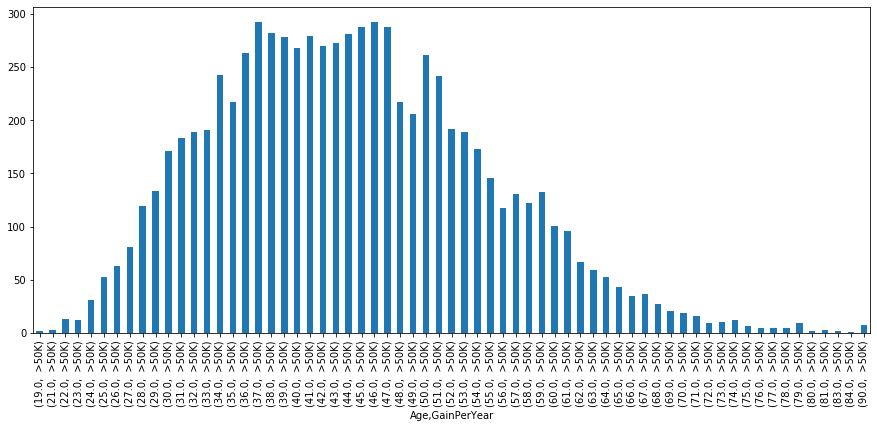

In [420]:
mascara = (data.GainPerYear == " >50K")

plt.figure(figsize=(15,6))
data.groupby([data.Age[mascara]])['GainPerYear'].value_counts().plot(kind='bar')

Para endeter um pouco melhor essa relação, dividimos as pessoas em 2 grupos, os mais velho(acima de 30 anos) e os mais novos(igual ou abaixo de 30 anos). Os gráficos a seguir montram exatamente essa diferença.

<h3>GRUPO DOS MAIS VELHOS</h3>

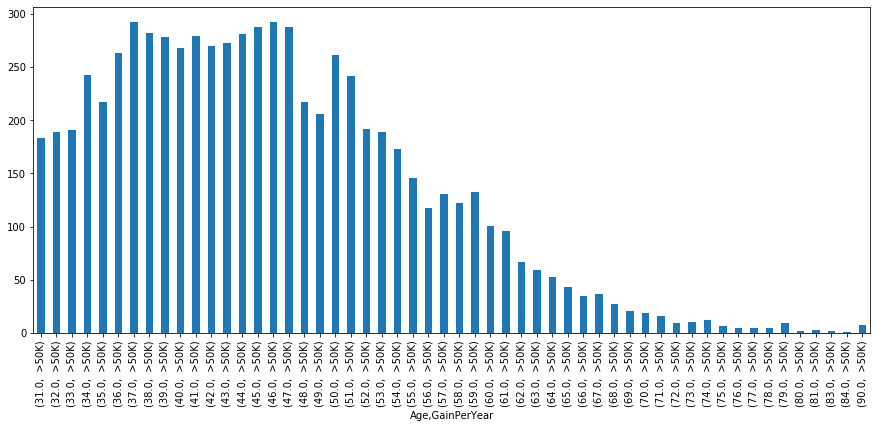

In [421]:
mais_velhos = (data.Age > 30) & (data.GainPerYear == " >50K")

plt.figure(figsize=(15,6))
data.groupby([data.Age[mais_velhos]])['GainPerYear'].value_counts().plot(kind='bar')

<h3>GRUPO DOS MAIS NOVOS</h3>

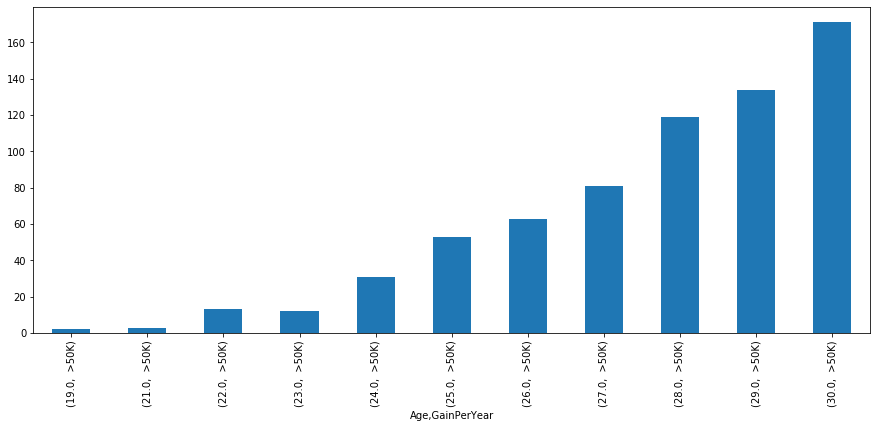

In [422]:
mais_novos = (data.Age <= 30) & (data.GainPerYear == " >50K")

plt.figure(figsize=(15,6))
data.groupby([data.Age[mais_novos]])['GainPerYear'].value_counts().plot(kind='bar')

Fizemos uma soma para análisar a quantidade de pessoas com renda anual superior a 50K em cada um dos grupo.

Podemos concluir que a idade tem grande relação com o ganho anual.

In [423]:
mais_velhos = (data.Age > 30) & (data.GainPerYear == " >50K")
mais_velhos.sum()

7159

In [424]:
mais_novos = (data.Age <= 30) & (data.GainPerYear == " >50K")
mais_novos.sum()

682

<h3>SEXO x RENDA ANUAL</h3>

Começamos exibindo um gráfico que mostra a relação entre o sexo e e o ganho anual. Nesse gráfico filtramos a coluna Sex por renda anual superior a 50K.

O problema dessa análise é que a gantidade de pessoas do sexo masculino é muito maior que do sexo feminino.
Para tentar resolver esse problema, tiramos esse número em porcentagem.

O resultado é que temos aproximadamente 20% a mais de pessoal do sexo masculino, com renda superior a 50K.

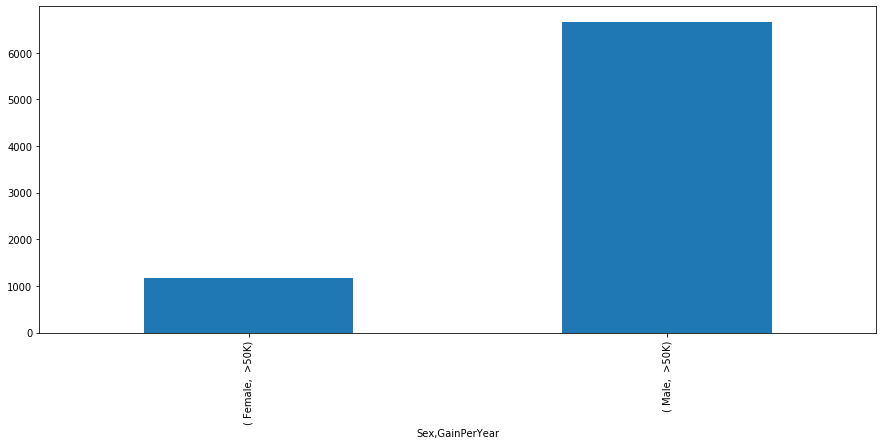

In [425]:
mascara = (data.GainPerYear == " >50K")

plt.figure(figsize=(15,6))
data.groupby([data.Sex[mascara]])['GainPerYear'].value_counts().plot(kind='bar')

<h3>SEXO MASCULINO %</h3>

In [426]:
mascara = (data.Sex == " Male")
total_male = data.Sex[mascara].value_counts()

mascara = (data.Sex == " Male") & (data.GainPerYear == " >50K")
partial_male = data.Sex[mascara].value_counts()

percent_male = partial_male / total_male * 100

percent_male

 Male    30.573658
Name: Sex, dtype: float64

<h3>SEXO FEMININO %</h3>

In [427]:
mascara = (data.Sex == " Female")
total_female = data.Sex[mascara].value_counts()

mascara = (data.Sex == " Female") & (data.GainPerYear == " >50K")
partial_female = data.Sex[mascara].value_counts()

percent_female = partial_female / total_female * 100

percent_female

 Female    10.946059
Name: Sex, dtype: float64

<h3>ESCOLARIDADE x RENDA ANUAL</h3>

Nossa última análise é em relação a escolaridade, a ideia aqui é tentar entender a relação entre o grau de escolaridade e a renda anual.

Para isso começamos gerando um gráfico que exibe a quantidade de pessoas com reda superior a 50K, separadas por seu grau de escolaridade.

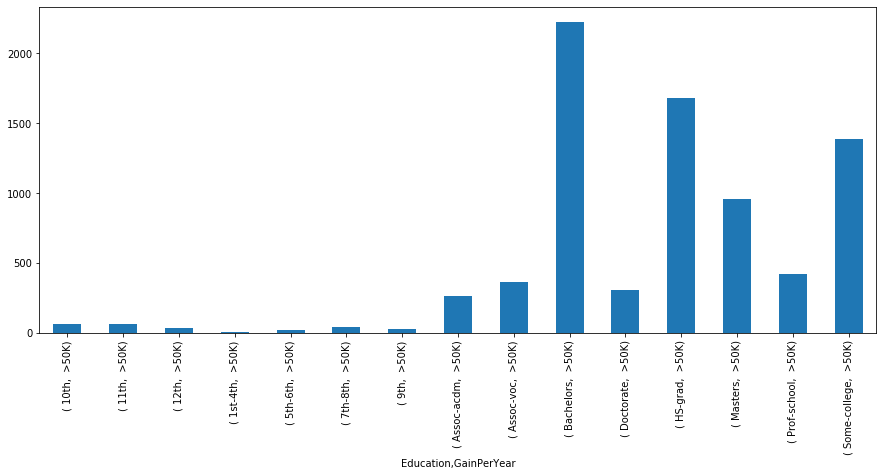

In [428]:
mascara = (data.GainPerYear == " >50K")

plt.figure(figsize=(15,6))
data.groupby([data.Education[mascara]])['GainPerYear'].value_counts().plot(kind='bar')

Novamente separamos as pessoas em 2 grupos, com graduação(ensino superior completo ou superior), sem graduação(sem ensino superior).

O resultado é que apesar de existirem mais pessoas sem ensino superior no geral, quando comparamos com a renda anual superior a 50K, os números são bastante pŕximos.

O que indica que o grau de escolaridade tem uma relação direta com o ganho anual.

In [429]:
com_graduacao = (data.EducationNum >= 13) & (data.GainPerYear == " >50K")
com_graduacao.sum()

3909

In [430]:
sem_graduacao = (data.EducationNum < 13) & (data.GainPerYear == " >50K")
sem_graduacao.sum()

3932